CTAB-GAN addresses the limitations of the prior state-of-the-art:
- encoding mixed data type of continuous and categorical variables
- efficient modeling of long tail continuous variables
- increased robustness to imbalanced categorical variables along with skewed continuous variables. 

Furthermore, two key features of CTAB-GAN are the introduction of classification loss *(which is not clearly descibed in paper)* in conditional GAN, and novel encoding for the conditional vector that efficiently encodes mixed variables and helps to deal with highly skewed distributions for continuous variables.

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def treat_long_tail(s):
    e = 1e-6
    l = min(s.min(),0)
    return np.log(s-l+e) if l <= 0 else np.log(s)

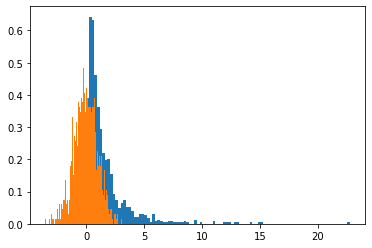

In [45]:
mu, sigma = 0., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 100, density=True)
count, bins, ignored = plt.hist(treat_long_tail(s), 100, density=True)

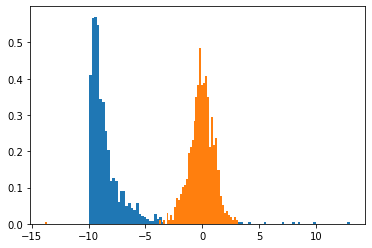

In [46]:
mu, sigma = 0., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)-10
count, bins, ignored = plt.hist(s, 100, density=True)
count, bins, ignored = plt.hist(treat_long_tail(s), 100, density=True)

This experiment show that the `treat_long_tail` method proposed in CTAB-GAN depends on the type of long tail distribution. With the 

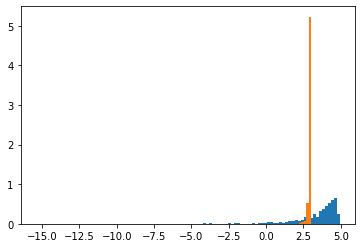

In [48]:
mu, sigma = 0., 1. # mean and standard deviation
s = -np.random.lognormal(mu, sigma, 1000)+5
count, bins, ignored = plt.hist(s, 100, density=True)
count, bins, ignored = plt.hist(treat_long_tail(s), 100, density=True)